<a href="https://colab.research.google.com/github/aditipatil0711/SJSU_Masters_Assignments/blob/main/CMPE255_Data_Mining/Assignment%203/SEMMA/SEMMA_with_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **SEMMA with  Manual and AutoML approaches**

SEMMA is a methodology for data mining and analytics. It stands for Sample, Explore, Modify, Model, and Assess. Each of these steps represents a stage in the process of understanding and modeling the data:

1. Sample: Begin with a subset of the data. This helps in gaining an understanding without being overwhelmed and also aids in performance optimization.
2. Explore: Examine the data to understand its structure, relationships, anomalies, etc.
3. Modify: Prepare the data for modeling. This could involve data cleaning, feature engineering, and other preprocessing tasks.
4. Model: Develop predictive or descriptive models using machine learning or statistical algorithms.
5. Assess: Evaluate the performance of the models using appropriate metrics.
Initial Setup:
For this exercise, we'll be using a Kaggle dataset on IMDB movies. We'll be walking through the SEMMA steps with this dataset. Let's start with the "Sample" step.

# Step 1: Sample
In the Sample phase, our goal is to create a manageable subset of the data. Large datasets can be computationally expensive to work with in the initial stages, so we begin by working with a representative sample. This allows us to get a feel for the data without investing too much time or computational resources.

In [ ]:
# Importing necessary libraries
import pandas as pd

from google.colab import files
uploaded = files.upload()

# Load the dataset
movie_data = pd.read_csv("movie_metadata.csv")

# Display the shape of the dataset and the first few rows to understand its structure
dataset_shape = movie_data.shape
dataset_head = movie_data.head()

dataset_shape, dataset_head


Saving movie_metadata.csv to movie_metadata.csv


((5043, 28),
    color      director_name  num_critic_for_reviews  duration  \
 0  Color      James Cameron                   723.0     178.0   
 1  Color     Gore Verbinski                   302.0     169.0   
 2  Color         Sam Mendes                   602.0     148.0   
 3  Color  Christopher Nolan                   813.0     164.0   
 4    NaN        Doug Walker                     NaN       NaN   
 
    director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
 0                      0.0                   855.0  Joel David Moore   
 1                    563.0                  1000.0     Orlando Bloom   
 2                      0.0                   161.0      Rory Kinnear   
 3                  22000.0                 23000.0    Christian Bale   
 4                    131.0                     NaN        Rob Walker   
 
    actor_1_facebook_likes        gross                           genres  ...  \
 0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sc

# 2: Explore

In the "Explore" phase of the SEMMA methodology, our objective is to understand the dataset's characteristics more deeply. This includes:

1. Summary Statistics: We'll gather descriptive statistics for numerical columns to understand their distributions.
2. Missing Values: We'll identify columns with missing values and determine how pervasive these missing values are.
3. Unique Values: For categorical columns, we'll examine the number of unique values to understand their diversity.
4. Visual Exploration: Visualization can be a powerful tool. We'll create a few plots to understand the distribution of key features and relationships between them.

Procedure for Chunk 2: **bold text**

* Generate summary statistics for the numerical columns.
* Identify columns with missing values and their count.
* Determine the number of unique values for categorical columns.
* Visualize key columns to understand their distributions and relationships.

In [ ]:
# Summary statistics for numerical columns
numerical_summary = movie_data.describe()

# Displaying the summary statistics
numerical_summary


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


The summary statistics provide insights into the distribution of the numerical columns in the dataset:

* num_critic_for_reviews: The average number of reviews by critics is around 140 with a wide range (from 1 to 813).
* duration: The average movie duration is approximately 107 minutes, with movies as short as 7 minutes and as long as 511 minutes.
* gross: The average gross revenue of movies is around 48 million USD, with some movies earning as little as 162 USD and others as much as 760 million USD.
* imdb_score: The average IMDB score across movies is 6.44, with scores ranging between 1.6 and 9.5.
* movie_facebook_likes: Movies, on average, have around 7,525 Facebook likes. Some movies have zero likes, while others have as many as 349,000 likes.

 2: Explore

Now, we'll move forward with:

* Identifying columns with missing values and quantifying them.
* Determining the number of unique values for categorical columns.

In [ ]:
# Identifying missing values for each column
missing_values = movie_data.isnull().sum()

# Filter out columns that have no missing values for clarity
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

missing_values


gross                      884
budget                     492
aspect_ratio               329
content_rating             303
plot_keywords              153
title_year                 108
director_name              104
director_facebook_likes    104
num_critic_for_reviews      50
actor_3_name                23
actor_3_facebook_likes      23
num_user_for_reviews        21
color                       19
duration                    15
facenumber_in_poster        13
actor_2_name                13
actor_2_facebook_likes      13
language                    12
actor_1_name                 7
actor_1_facebook_likes       7
country                      5
dtype: int64

The columns with missing values and their respective counts are as follows:

1. gross: 884 missing values
2. budget: 492 missing values
3. aspect_ratio: 329 missing values
4. content_rating: 303 missing values
5. plot_keywords: 153 missing values

... and so on for other columns.


Having missing values in the dataset can lead to biases and inaccuracies in our analysis and models. It's crucial to address these in the "Modify" phase.

Next, let's determine the number of unique values for categorical columns to gauge their diversity.

In [ ]:
t

In [ ]:
# Identifying unique values for categorical columns
categorical_columns = movie_data.select_dtypes(include=['object']).columns
unique_values_categorical = movie_data[categorical_columns].nunique().sort_values(ascending=False)

unique_values_categorical


movie_imdb_link    4919
movie_title        4917
plot_keywords      4760
actor_3_name       3521
actor_2_name       3032
director_name      2398
actor_1_name       2097
genres              914
country              65
language             47
content_rating       18
color                 2
dtype: int64

Notable observations:

1. movie_imdb_link and movie_title have almost the same number of unique values, implying that most movies in the dataset have distinct titles and links.
2. The genres column has 914 unique combinations, indicating that movies are often tagged with multiple genres.
3. color has only 2 unique values, suggesting that it's a binary classification (probably "Color" vs. "Black and White").

# 3: Modify

In the "Modify" phase of the SEMMA methodology, the primary focus is on data preprocessing. This involves:

* Handling Missing Values: This can be achieved by imputing them with relevant statistics (mean, median) or using more sophisticated techniques.
* Feature Engineering: Creating new features or transforming existing ones to better capture the underlying patterns.
* Encoding Categorical Variables: Machine learning models require numerical input, so we'll convert categorical variables into a format suitable for modeling.
* Outlier Detection: Identify and handle outliers that might skew the results.

**Procedure for Chunk 3:**

* Address missing values. Given the extent of missing data, we'll discuss potential strategies.
* Feature engineering (if deemed necessary).
* Encode categorical variables.
* Check for outliers in key numerical columns.

For now Let us:
1. Drop rows where the missing values are minimal and seem random.
2. Use median imputation for numerical columns with missing values.
3. Use mode imputation for categorical columns with missing values.

In [ ]:
# Drop rows where missing values are minimal and random
minimal_missing_columns = ['actor_1_name', 'actor_1_facebook_likes', 'actor_2_name', 'actor_2_facebook_likes',
                           'actor_3_name', 'actor_3_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews',
                           'language', 'color', 'duration', 'director_name', 'director_facebook_likes']

movie_data_cleaned = movie_data.dropna(subset=minimal_missing_columns)

# Median imputation for numerical columns
numerical_columns_with_na = ['gross', 'budget', 'aspect_ratio', 'num_critic_for_reviews']
for col in numerical_columns_with_na:
    median_value = movie_data_cleaned[col].median()
    movie_data_cleaned[col].fillna(median_value, inplace=True)

# Mode imputation for categorical columns
categorical_columns_with_na = ['content_rating']
for col in categorical_columns_with_na:
    mode_value = movie_data_cleaned[col].mode()[0]
    movie_data_cleaned[col].fillna(mode_value, inplace=True)

# Check remaining missing values
remaining_missing = movie_data_cleaned.isnull().sum()
remaining_missing = remaining_missing[remaining_missing > 0]

remaining_missing


plot_keywords    117
country            1
dtype: int64

In [ ]:
# Imputing 'plot_keywords' with 'Unknown'
movie_data_cleaned['plot_keywords'].fillna('Unknown', inplace=True)

# Mode imputation for 'country'
country_mode = movie_data_cleaned['country'].mode()[0]
movie_data_cleaned['country'].fillna(country_mode, inplace=True)

# Check if any missing values remain
remaining_missing_after = movie_data_cleaned.isnull().sum()
remaining_missing_after = remaining_missing_after[remaining_missing_after > 0]

remaining_missing_after


Series([], dtype: int64)

In [ ]:
# Creating a new feature 'movie_age'
current_year = 2023  # As per the current date
movie_data_cleaned['movie_age'] = current_year - movie_data_cleaned['title_year']

# Display the first few rows to check the new feature
movie_data_cleaned[['title_year', 'movie_age']].head()


,title_year,movie_age
0,2009.0,14.0
1,2007.0,16.0
2,2015.0,8.0
3,2012.0,11.0
5,2012.0,11.0


let's proceed with encoding the categorical columns.

1. One-Hot Encoding: This method creates a new column for each unique value in the categorical column. Each of these new columns will have a binary representation (0 or 1) indicating the presence of the feature. It's especially useful for nominal data (where there's no inherent order).
2. Label Encoding: This method converts each value in the column to a number. It's suitable for ordinal data where there's a clear ranking or order.
Given our selected columns:

* genres: We'll use one-hot encoding since there's no inherent order to movie genres.
* color, language, content_rating: We can use label encoding for simplicity, although one-hot encoding would work as well.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# One-Hot Encoding for 'genres'
genres_encoded = movie_data_cleaned['genres'].str.get_dummies(sep='|')
movie_data_encoded = pd.concat([movie_data_cleaned, genres_encoded], axis=1)

# Label Encoding for 'color', 'language', and 'content_rating'
label_columns = ['color', 'language', 'content_rating']
label_encoders = {}  # To store label encoders for potential future use

for col in label_columns:
    le = LabelEncoder()
    movie_data_encoded[col + '_encoded'] = le.fit_transform(movie_data_encoded[col])
    label_encoders[col] = le

# Display the first few rows to check the encoded features
movie_data_encoded[['genres'] + list(genres_encoded.columns) + ['color', 'color_encoded', 'language', 'language_encoded', 'content_rating', 'content_rating_encoded']].head()


,genres,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Sport,Thriller,War,Western,color,color_encoded,language,language_encoded,content_rating,content_rating_encoded
0,Action|Adventure|Fantasy|Sci-Fi,1,1,0,0,0,0,0,0,0,...,0,0,0,0,Color,1,English,11,PG-13,7
1,Action|Adventure|Fantasy,1,1,0,0,0,0,0,0,0,...,0,0,0,0,Color,1,English,11,PG-13,7
2,Action|Adventure|Thriller,1,1,0,0,0,0,0,0,0,...,0,1,0,0,Color,1,English,11,PG-13,7
3,Action|Thriller,1,0,0,0,0,0,0,0,0,...,0,1,0,0,Color,1,English,11,PG-13,7
5,Action|Adventure|Sci-Fi,1,1,0,0,0,0,0,0,0,...,0,0,0,0,Color,1,English,11,PG-13,7


# 4: Model

In the "Model" phase of the SEMMA methodology, the focus is on developing predictive or descriptive models using various machine learning or statistical algorithms. The steps involved in this phase are:

1. Feature Selection: Determine which features (or combinations of features) provide the most information for the modeling task.
2. Data Split: Divide the dataset into training and testing (and possibly validation) sets.
3. Model Selection: Choose appropriate algorithms based on the problem type (e.g., regression, classification, clustering).
4. Model Training: Train the selected models using the training data.
5. Model Evaluation: Evaluate the models' performance on the test set using appropriate metrics.
Procedure for Chunk 4:

* Determine our modeling objective (e.g., predicting the IMDB score, classifying movie genres, etc.).
* Select relevant features for the modeling task.
* Split the data into training and testing sets.
* Choose a suitable machine learning model.
* Train the model and evaluate its performance on the test set.

In [ ]:
from sklearn.model_selection import train_test_split

# Selecting features
numeric_features = ['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes',
                    'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes',
                    'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'actor_2_facebook_likes',
                    'movie_facebook_likes', 'movie_age']

categorical_encoded_features = ['color_encoded', 'language_encoded', 'content_rating_encoded']

# Genres were one-hot encoded earlier
genre_features = genres_encoded.columns.tolist()

selected_features = numeric_features + categorical_encoded_features + genre_features

# Splitting the data
X = movie_data_encoded[selected_features]
y = movie_data_encoded['imdb_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((3888, 41), (973, 41))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = lr_model.predict(X_test)

# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, rmse, mae, r2


(0.6079558135822495,
 0.7797152131273632,
 0.5813351314333327,
 0.47340651215506657)

The Linear Regression model's performance on the test set is as follows:

* Mean Squared Error (MSE): 0.608
* Root Mean Squared Error (RMSE): 0.780
* Mean Absolute Error (MAE): 0.581
* R-squared (R^2): 0.473

Interpretation:

* The RMSE of 0.780 indicates that, on average, our model's predictions are about 0.780 points away from the actual IMDB scores.
* The MAE provides a similar interpretation but is less sensitive to large individual errors.
* The R^2 value of 0.473 suggests that our model explains approximately 47.3% of the variance in the IMDB scores.

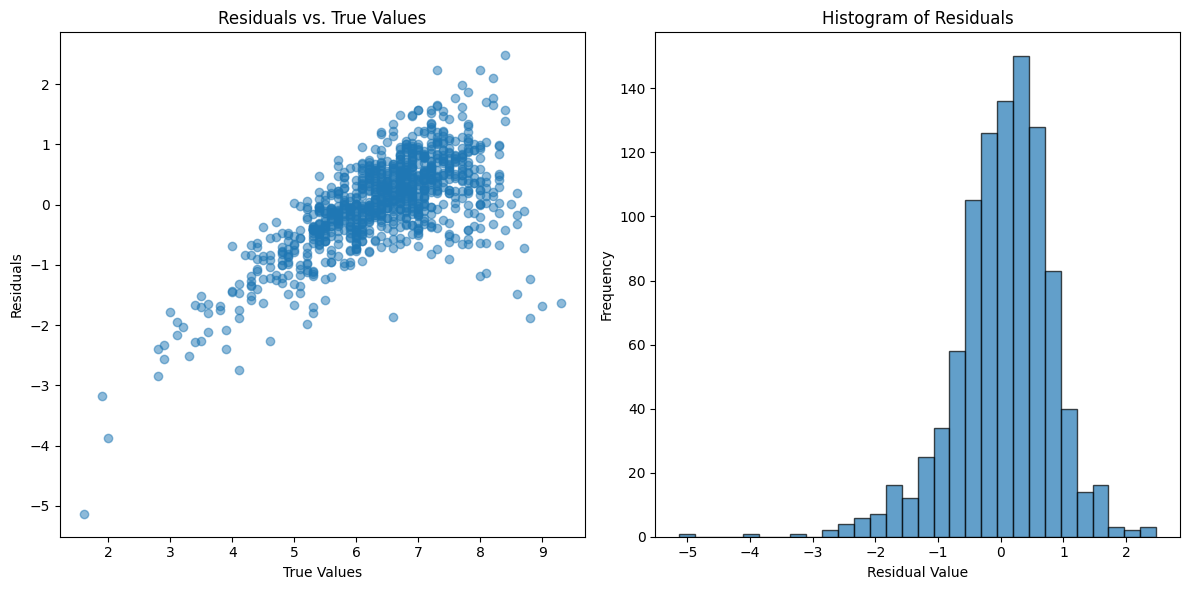

In [ ]:
import matplotlib.pyplot as plt

# Calculating residuals
residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(12, 6))

# Residual scatter plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, residuals, alpha=0.5)
plt.title("Residuals vs. True Values")
plt.xlabel("True Values")
plt.ylabel("Residuals")

# Histogram of residuals
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


# **Using AutoML to compare with normal Library Results:**

# Step 1: Install PyCaret (AutoML)

In [ ]:
!pip install pycaret

# Pycaret Setup for Regression

In [ ]:
from pycaret.regression import *
s = setup(data=movie_data_encoded, target='imdb_score', session_id=42)

,Description,Value
0,Session id,42
1,Target,imdb_score
2,Target type,Regression
3,Original data shape,"(4861, 56)"
4,Transformed data shape,"(4861, 70)"
5,Transformed train set shape,"(3402, 70)"
6,Transformed test set shape,"(1459, 70)"
7,Ordinal features,1
8,Numeric features,43
9,Categorical features,12


# Compare Models

In [ ]:
best = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,0.7043,0.8651,0.9296,0.3132,0.1441,0.1284,0.4380
llar,Lasso Least Angle Regression,0.7084,0.8733,0.9340,0.3069,0.1448,0.1294,0.3650
lasso,Lasso Regression,0.7084,0.8733,0.9340,0.3069,0.1448,0.1294,0.4170
omp,Orthogonal Matching Pursuit,0.7674,1.0122,1.0054,0.1973,0.1543,0.1402,0.5160
ridge,Ridge Regression,0.8304,1.1952,1.0923,0.0533,0.1650,0.1510,0.5620
br,Bayesian Ridge,0.8423,1.2286,1.1074,0.0269,0.1669,0.1529,0.3120
lightgbm,Light Gradient Boosting Machine,0.8429,1.2285,1.1074,0.0269,0.1668,0.1527,1.9570
lr,Linear Regression,0.8423,1.2286,1.1074,0.0269,0.1669,0.1529,1.4410
et,Extra Trees Regressor,0.8421,1.2288,1.1075,0.0268,0.1669,0.1529,1.2540
gbr,Gradient Boosting Regressor,0.8429,1.2286,1.1075,0.0268,0.1668,0.1527,1.8030


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

You can see we used Linear Regression while calculating , but Pycaret recommends the best model to be Elastic Net.

# Predict Results with AutoML Calculations

In [ ]:
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Elastic Net,0.6704,0.7663,0.8754,0.3338,0.1341,0.1195
